In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.compose
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.decomposition import PCA
import numpy as np

In [4]:
from dataset import HARDatasetCrops

In [5]:
from tslearn.generators import random_walk_blobs

## Data

### Features

We'll use **all** the signals.

In [6]:
dataset = HARDatasetCrops('dataset/train', 256, 25, 25, metadata_file='dataset/data_subjects_info.csv')

In [7]:
X = np.array([[
               # sample[:,0],
               # sample[:,1],
               # sample[:,2],
               # sample[:,3],
               # sample[:,4],
               # sample[:,5],
               np.linalg.norm(sample[:,6:9], axis=1),
               np.linalg.norm(sample[:,9:12], axis=1)
              ] for sample, _, _ in dataset])

In [8]:
X.shape

(4156, 2, 256)

In [9]:
X = X.transpose(0, 2, 1)

In [10]:
X.shape

(4156, 256, 2)

### Classes

The classes are the following:

In [11]:
dataset.CLASSES

{'dws': 'down-stairs',
 'ups': 'up-stairs',
 'wlk': 'walk',
 'std': 'standing',
 'sit': 'sitting',
 'jog': 'jogging'}

In order to fit a `sklearn` model we should encode each class with a unique integer:

In [12]:
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoder.fit(list(dataset.CLASSES.keys()));

In [13]:
y = label_encoder.transform([cls for _, cls, _ in dataset])

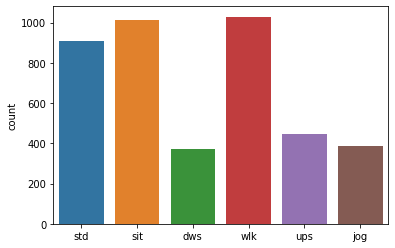

In [14]:
sns.countplot(label_encoder.inverse_transform(y));

#### Train-test splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
print('Number of training examples:', y_train.shape[0])
print('Number of testing examples:', y_test.shape[0])

Number of training examples: 3324
Number of testing examples: 832


## Support vector machine

### Global Alignment Kernel

In [17]:
import tslearn.svm

clf = tslearn.svm.TimeSeriesSVC(max_iter=200, probability=False)

In [ ]:
clf.fit(X_train, y_train)

#### Cross-validated parameter search

In [20]:
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV

In [21]:
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=0)

#### Cross-validates parameter search

#### Hyper-parameter search

In [22]:
param_grid =  {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.001, 0.0001]
}

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=cv)

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
import pandas as pd

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
cv_results

### Best results

In [ ]:
print(classification_report(y_train, grid_search.predict(X_train), target_names=label_encoder.classes_))

In [ ]:
plot_confusion_matrix(grid_search, X_train, y_train,
                      display_labels=label_encoder.classes_,
                      cmap=plt.cm.Blues,
                      normalize="true")

In [ ]:
print(classification_report(y_test, grid_search.predict(X_test), target_names=label_encoder.classes_))

In [ ]:
plot_confusion_matrix(grid_search, X_test, y_test,
                      display_labels=label_encoder.classes_,
                      cmap=plt.cm.Blues,
                      normalize="true")